In [1]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,load_model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [ ]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
	# save model
	model.save('final_model.h5')

# entry point, run the test harness
run_test_harness()

11501568/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


#Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
# run the test harness for evaluating a model
def run_evaluate():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# load model
	model = load_model("/content/drive/MyDrive/final_model.h5")
  print('hello')

  confusion = confusion_matrix(testY, np.argmax(model.predict(testX),axis=1))

  print(confusion)
	# evaluate model on test dataset
	# _, acc = model.evaluate(testX, testY, verbose=0)
	# print('> %.3f' % (acc * 100.0))

# entry point, run the test harness
run_evaluate()

#Confusion Matrix

In [ ]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# load model
model = load_model("/content/drive/MyDrive/final_model.h5")

confusion = classification_report(np.argmax(testY, axis=1), np.argmax(model.predict(testX),axis=1))

print(confusion)

hello
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       1.00      0.99      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
from keras.models import load_model

In [ ]:
import cv2
import numpy as np
from skimage import morphology
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [ ]:
def cropImage(timg,tol=0):
    # Convert to binary
    # (thresh, timg) = cv2.threshold(timg, 127, 255, cv2.THRESH_BINARY)
    #  Crop only ones from binary
    mask = timg>tol
    timg = timg[np.ix_(mask.any(1),mask.any(0))]
    # Add padding to the image
    timg = np.pad(timg, pad_width=round(timg.shape[0]*0.1),mode='constant',constant_values = 0)
    timg = timg.astype(np.uint8)
    # Resize the image to 200*200 pixels
    timg = cv2.resize(timg, (28,28), interpolation = cv2.INTER_AREA)
    timg[timg > 0] = 255
    # timg = cv2.blur(timg,(25,25))
    return timg

def processImage(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    rimg,gimg,bimg = cv2.split(img)
    hsvimg = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    h,s,v = cv2.split(hsvimg)

    u_red = np.array([255,100,100])
    l_red = np.array([100,0,0])
    mask = cv2.inRange(img,l_red,u_red)
    blur = cv2.medianBlur(mask,3)

    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(15,15))
    dilation = cv2.dilate(blur,kernel,1)

    # rmimg = morphology.remove_small_objects(dilation.astype(bool),min_size=250,connectivity=2).astype(np.uint8)*255
    # arr = np.nonzero(rmimg)
    # l_range = arr[1].min()
    # h_range = arr[1].max()

    arr = np.nonzero(dilation)
    unique,counts = np.unique(arr[1],return_counts=True)
    center = unique[np.argmax(counts == counts.max())]
    l_range = center - 50
    h_range = center + 50

    blur[:,:] = 0
    blur[:,l_range:h_range] = 255
    s[s>50]= 255
    outimg = cv2.bitwise_and(blur,s)
    outimg[outimg< 127] = 0

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
    outimg = cv2.dilate(outimg,kernel,1)

    return outimg

In [ ]:
img = cv2.imread('0.jpeg')
pimg = processImage(img)

In [ ]:
# img,labels,stats,centroids = cv2.connectedComponentsWithStats(img)
# labels = cv2.connectedComponentsWithStats(img)

_, thresh = cv2.threshold(pimg,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
connectivity = 8  # You need to choose 4 or 8 for connectivity type
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh , connectivity , cv2.CV_32S)
oneLabel = np.zeros_like(labels)
oneLabel[labels==1]=255
# cropImage(oneLabel)

e_data = {}
for i in range(1,len(centroids)):
    oneLabel = np.zeros_like(labels)
    oneLabel[labels==i]=255

    obj = lambda: None
    obj.img = cropImage(oneLabel)
    obj.center = centroids[i]
    e_data[i] = obj


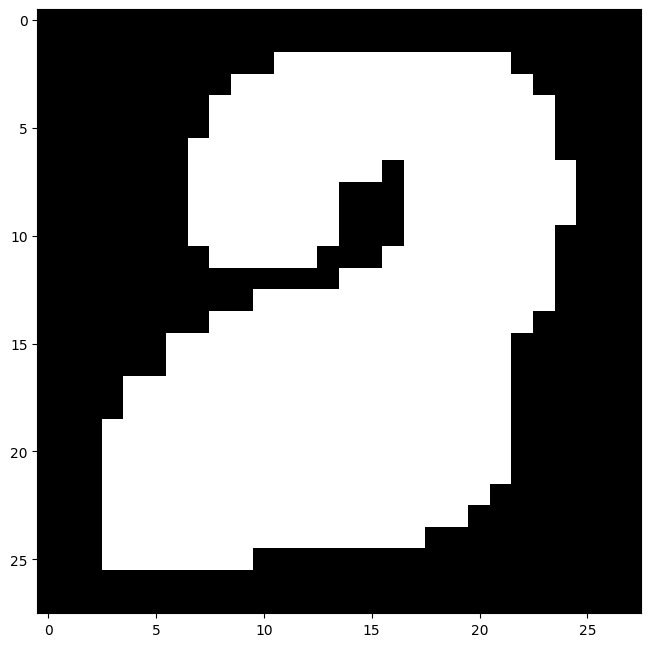

In [ ]:
plt.imshow(e_data[17].img,'gray')

In [ ]:
classifier = load_model("/content/final_model.h5")


In [ ]:
# timg = np.expand_dims(e_data[1].img,axis=0)
timg = e_data[17].img.reshape((28,28,1))
t2img = np.expand_dims(timg,axis=0)
pred = np.argmax(classifier.predict(t2img),axis=-1)
print(pred[0])
# num_arr = [0,1,2,3,4,5,6,7,8,9]
# for i in num_arr:
#   pred[pred]

# print(t)
# print

2


In [ ]:
print(t)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
